In [15]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model

In [3]:
dataset = pd.read_csv("resultado.csv", sep=";")

In [6]:
datset_sin_nulos = dataset.dropna()

In [7]:
datset_sin_nulos.shape

(45091, 21)

In [8]:
datset_sin_nulos.head()

,Unnamed: 0,edad,job,marital,education,default,balance,housing,loan,contact,...,month,year,child,no.hijos,duration,campaign,pdays,previous,poutcome,y
0,0,58.0,management,married,tertiary,No,2143.0,yes,no,unknown,...,may,2009,yes,1,261.0,1,-1.0,0,unknown,no
1,1,44.0,technician,single,secondary,No,29.0,yes,no,unknown,...,may,2009,yes,3,151.0,1,-1.0,0,unknown,no
2,2,33.0,entrepreneur,married,secondary,No,2.0,yes,yes,unknown,...,may,2012,no,0,76.0,1,-1.0,0,unknown,no
3,3,47.0,blue-collar,married,unknown,No,1506.0,yes,no,unknown,...,may,2013,no,0,92.0,1,-1.0,0,unknown,no
4,4,33.0,unknown,single,unknown,No,1.0,no,no,unknown,...,may,2011,yes,3,198.0,1,-1.0,0,unknown,no


In [16]:
#vector columna -- .values convierte en array
y = datset_sin_nulos.loc[:, "no.hijos"].values

In [24]:
#DataFrame
X=datset_sin_nulos[["edad"]].values

In [25]:
regresion_lineal = linear_model.LinearRegression()

In [26]:
regresion_lineal.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
regresion_lineal.coef_

array([-0.00036751])

In [29]:
regresion_lineal.intercept_

1.2698842033723696

In [30]:
regresion_lineal.predict([[0]])

array([1.2698842])

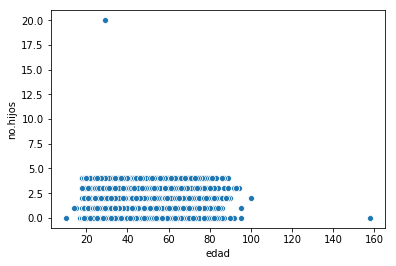

In [32]:
sb.scatterplot(data=datset_sin_nulos, x="edad", y="no.hijos")

In [35]:
dataset_edad_hijos_validos = datset_sin_nulos.loc[
  (datset_sin_nulos.edad < 140) & (datset_sin_nulos.loc[:, "no.hijos"].values<10), :]


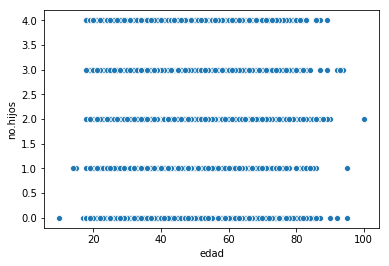

In [36]:
sb.scatterplot(data=dataset_edad_hijos_validos, x="edad", y="no.hijos")

In [37]:
y = dataset_edad_hijos_validos.loc[:, "no.hijos"].values

In [38]:
X=dataset_edad_hijos_validos[["edad"]].values

In [41]:
regresion_lineal_2= linear_model.LinearRegression()

In [42]:
regresion_lineal_2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
regresion_lineal_2.coef_

array([-0.00029565])

In [44]:
regresion_lineal_2.intercept_

1.2665540424978354

### Separar conjunto de entrebamiento y de pruebas

In [46]:
porcentaje_entrenamiento = 0.8

In [47]:
porcentaje_pruebas = 1- porcentaje_entrenamiento

In [48]:
fila_max_entrenamiento=round(dataset_edad_hijos_validos.shape[0]*porcentaje_entrenamiento)

In [52]:
train = dataset_edad_hijos_validos.loc[:fila_max_entrenamiento-1, :]
test = dataset_edad_hijos_validos.loc[fila_max_entrenamiento:,:]

In [53]:
train.shape[0] + test.shape[0]

45089

#### edad --> balance

In [71]:
from sklearn.metrics import mean_squared_error
import math

In [81]:
X_train = train[["edad"]].values
y_train = train.loc[:, "balance"].values

In [82]:
X_test = test[["edad"]].values
y_test = test.loc[:, "balance"].values

In [75]:
regresion_train = linear_model.LinearRegression()

In [76]:

regresion_train.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
y_pred = regresion_train.predict(X_test)

In [78]:
math.sqrt(mean_squared_error(y_pred, y_test))

3523.9889065110133

In [79]:
y_pred

array([1041.06539091, 1342.94203792, 1141.69093992, ..., 2072.47726819,
       1695.13145943, 1192.00371442])

#### edad + duracion --> balance

In [83]:
X_train2 = train[["edad", "duration"]].values
X_test2 = test[["edad", "duration"]].values

In [84]:
lr_edad_duracion = linear_model.LinearRegression()

In [85]:
lr_edad_duracion.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
y_pred2 = lr_edad_duracion.predict(X_test2)

In [87]:
math.sqrt(mean_squared_error(y_test,y_pred2))

3522.1860070498324

In [93]:
from sklearn.metrics import r2_score, mean_absolute_error

In [91]:
r2_score( y_test, y_pred)

0.005588093410566652

In [92]:
r2_score(y_test, y_pred2)

0.006605330482972627

In [94]:
mean_absolute_error(y_test, y_pred)

1580.56495101271

In [95]:
mean_absolute_error(y_test, y_pred2)

1579.0019868177812